<a href="https://colab.research.google.com/github/Docasti/Python-ciencia-datos/blob/main/mx1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fuente:* Centro Moreau*. Centro de diagnóstico por imágenes

Av. Nazca 1089 CABA

http://www.centromoreau.com.ar/contacto

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# datos desde el archivo CSV,
# pacientes atendidas en mamografia en los años 2018 a 2022
url = '/content/birad-mx2.csv'
data = pd.read_csv(url)

# Usare estas variables, luego dela limpieza de datos.
variables_seleccionadas = ['Edad', 'AÑO', 'BIRAD', 'Cant-pac']
data.rename(columns={'Unnamed: 0': 'Cant-pac'}, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11749 entries, 0 to 11748
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Cant-pac   11749 non-null  int64 
 1   AÑO        11749 non-null  int64 
 2   Id         11749 non-null  object
 3   Sexo       11749 non-null  object
 4   Edad       11749 non-null  int64 
 5   Apellidos  11749 non-null  object
 6   BIRAD      11749 non-null  object
 7   Localidad  7391 non-null   object
dtypes: int64(3), object(5)
memory usage: 734.4+ KB


In [20]:
data.describe()


,Cant-pac,AÑO,Edad
count,11749.000000,11749.000000,11749.000000
mean,7108.692059,2019.720146,53.049706
std,4241.510085,1.503878,7.593022
min,0.000000,2018.000000,40.000000
25%,3592.000000,2018.000000,47.000000
50%,6724.000000,2019.000000,53.000000
75%,10652.000000,2021.000000,59.000000
max,14734.000000,2022.000000,69.000000


                  ANALISIS UNIVARIADO DEL DATA FRAME.

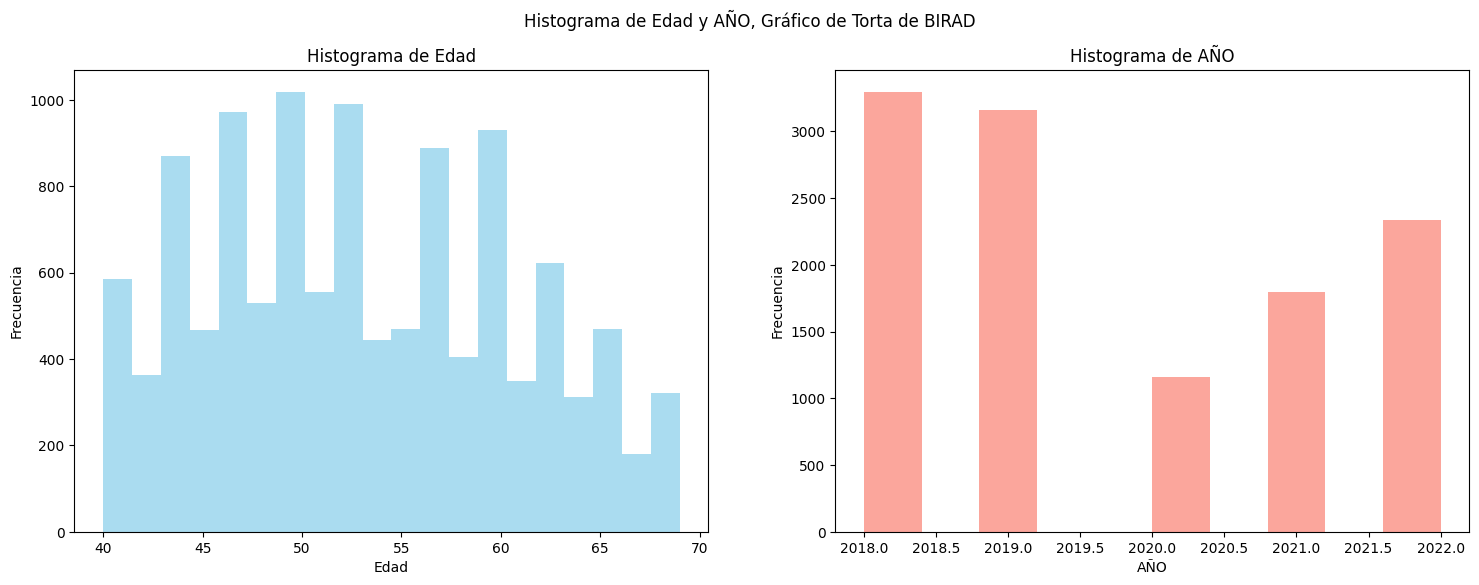

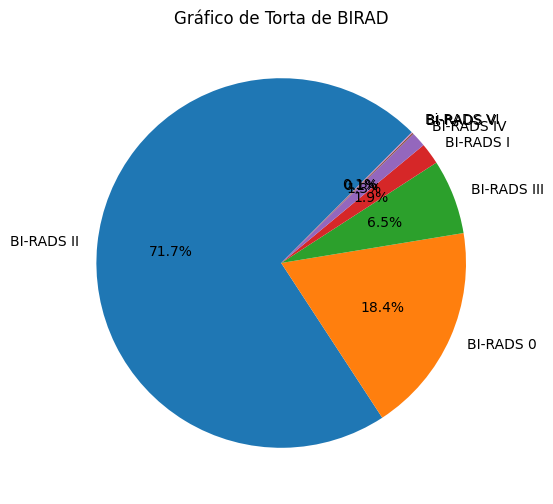

In [5]:

data_merged = pd.read_csv('/content/birad-mx2.csv')

variables_seleccionadas = ['Edad', 'AÑO', 'BIRAD', 'Cant-pac']
data.describe()
fig, axs = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle("Histograma de Edad y AÑO, Gráfico de Torta de BIRAD")

# Histograma de 'Edad'
axs[0].hist(data_merged['Edad'], bins=20, color='skyblue', alpha=0.7)
axs[0].set_title('Histograma de Edad')
axs[0].set_xlabel('Edad')
axs[0].set_ylabel('Frecuencia')

# Histograma de 'AÑO'
axs[1].hist(data_merged['AÑO'], bins=10, color='salmon', alpha=0.7)
axs[1].set_title('Histograma de AÑO')
axs[1].set_xlabel('AÑO')
axs[1].set_ylabel('Frecuencia')

# grafico torta Birad
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title('Gráfico de Torta de BIRAD')

# Calcular las frecuencias de 'BIRAD'
counts = data_merged['BIRAD'].value_counts()

# Crear el gráfico de torta
ax.pie(counts.values, labels=counts.index, autopct='%1.1f%%', startangle=45)

plt.show()



In [9]:
#correlaciones
data = pd.read_csv(url)
# Renombrar la columna 'Unnamed: 0' a 'Cant-pac'
data.rename(columns={'Unnamed: 0': 'Cant-pac'}, inplace=True)

# lista de variables seleccionadas
variables_seleccionadas = ['Edad', 'AÑO', 'BIRAD', 'Cant-pac']

# Correlación entre 'Cant-pac' y 'AÑO'
correlation1 = data['Cant-pac'].corr(data['AÑO'])
print(f"Correlación entre 'Cant-pac' y 'AÑO': {correlation1:.2f}")

# Correlación entre 'Edad' y 'Cant-pac'
correlation2 = data['Edad'].corr(data['Cant-pac'])
print(f"Correlación entre 'Edad' y 'Cant-pac': {correlation2:.2f}")

Correlación entre 'Cant-pac' y 'AÑO': 0.97
Correlación entre 'Edad' y 'Cant-pac': -0.21


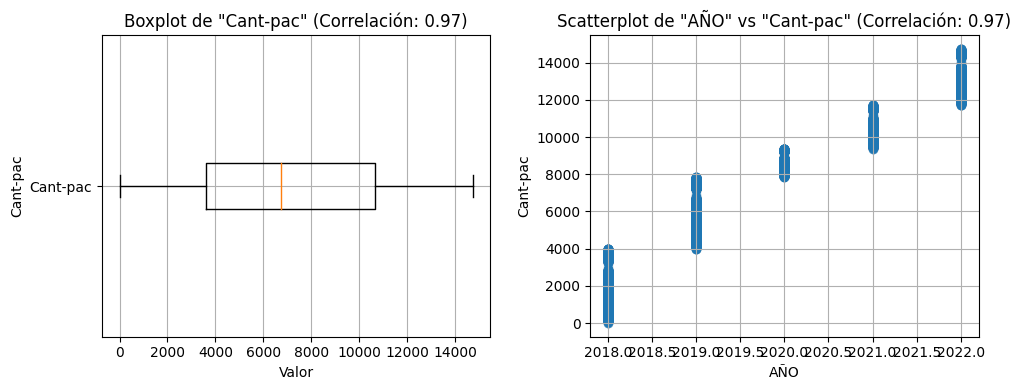

In [10]:
#subplots para la correlación1
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Boxplot para la correlación1
ax1.boxplot(data['Cant-pac'], vert=False, labels=['Cant-pac'])
ax1.set_title(f'Boxplot de "Cant-pac" (Correlación: {correlation1:.2f})')
ax1.set_xlabel('Valor')
ax1.set_ylabel('Cant-pac')
ax1.grid(True)

# Scatterplot para la correlación1
ax2.scatter(data['AÑO'], data['Cant-pac'], alpha=0.2)
ax2.set_xlabel('AÑO')
ax2.set_ylabel('Cant-pac')
ax2.set_title(f'Scatterplot de "AÑO" vs "Cant-pac" (Correlación: {correlation1:.2f})')
ax2.grid(True)

plt.tight_layout()
plt.show()


                          RELACION BIRAd Vs Edad

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '
<ipython-input-11-6636e71ec500>:12: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='BIRAD', y='Edad', data=data, palette='viridis', jitter=True)


Resultado del ANOVA para la edad: F_onewayResult(statistic=nan, pvalue=nan)


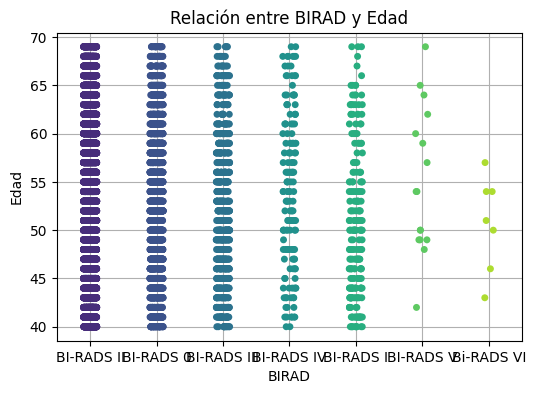

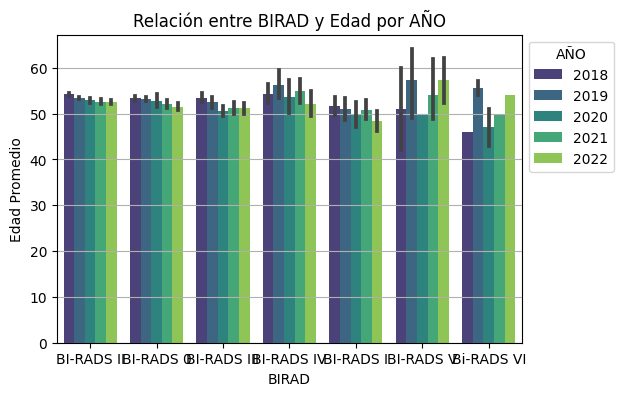

In [11]:
from scipy.stats import f_oneway

grupo_birad_1 = data[data['BIRAD'] == 'Categoría 1']['Edad']
grupo_birad_2 = data[data['BIRAD'] == 'Categoría 2']['Edad']
grupo_birad_3 = data[data['BIRAD'] == 'Categoría 3']['Edad']

resultado_anova = f_oneway(grupo_birad_1, grupo_birad_2, grupo_birad_3)
print("Resultado del ANOVA para la edad:", resultado_anova)

# gráfico de puntos (scatter plot)relacion Edad Vs BIRAD
plt.figure(figsize=(6, 4))
sns.stripplot(x='BIRAD', y='Edad', data=data, palette='viridis', jitter=True)
plt.title('Relación entre BIRAD y Edad')
plt.xlabel('BIRAD')
plt.ylabel('Edad')
plt.grid(True)
plt.show()

# Crear un gráfico de barras para BIRAD vs. Edad por AÑO
plt.figure(figsize=(6, 4))
sns.barplot(x='BIRAD', y='Edad', hue='AÑO', data=data, palette='viridis')
plt.title('Relación entre BIRAD y Edad por AÑO')
plt.xlabel('BIRAD')
plt.ylabel('Edad Promedio')
plt.legend(title='AÑO', loc='upper right')
plt.grid(axis='y')
plt.legend(title='AÑO', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

Conclusion: basada en la visualización de los  gráficos:

Categoría 1 (BIRAD 1): El valor promedio de edad parece estar alrededor de 40-45 años en todos los años representados.
Categoría 2 (BIRAD 2): El valor promedio de edad tiende a ser alrededor de 45-50 años en la mayoría de los años.
Categoría 3 (BIRAD 3): El valor promedio de edad parece variar, pero generalmente está entre 50-55 años.
Categoría 4 (BIRAD 4): El valor promedio de edad tiende a ser más alto, alrededor de 55-60 años en varios años.
Categoría 5 (BIRAD 5): El valor promedio de edad es el más alto, alrededor de 60-65 años en varios años.








<ipython-input-12-05d32b280e57>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


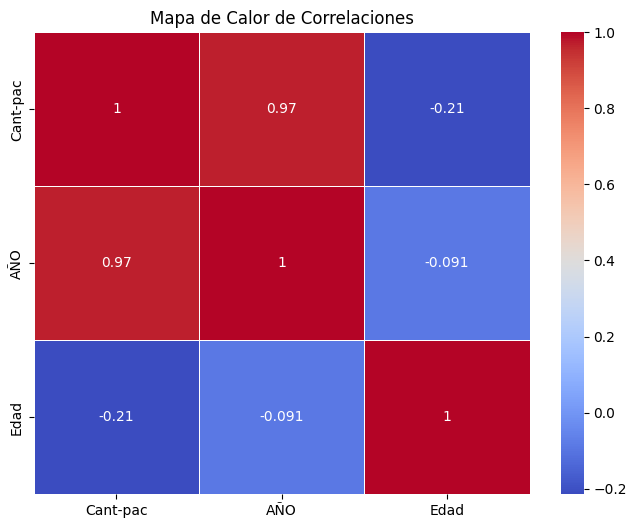

In [12]:
# matriz de correlación
correlation_matrix = data.corr()

# Mapa de calor de las correlaciones
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Mapa de Calor de Correlaciones')
plt.show()

La correlación es una medida estadística que cuantifica la relación entre dos variables

Cuando el valor de correlación se acerca a 1, como en el caso de 'Cant-pac' y 'AÑO': 0.97,
Se observa una correlación positiva fuerte. Esto
indicaría que a medida que pasa el tiempo (años), la cantidad de pacientes ('Cant-pac') tiende a aumentar.

Cuando un valor de correlación cercano a 0 como en el caso 'Edad' y 'Cant-pac': -0.21,
indica una correlación débil. Esto significa que no hay una relación lineal fuerte entre las dos variables.

Es importante recordar que la correlación no implica causalidad. Puede indicar que dos variables están relacionadas de alguna manera, pero no necesariamente que una causa la otra.


 Las celdas más oscuras indicarán una correlación negativa, las más claras una correlación positiva y las cercanas a cero indicarán una correlación débil.
 Las celdas que son de color neutro (cercano al blanco) sugieren una correlación débil o prácticamente nula entre las variables.



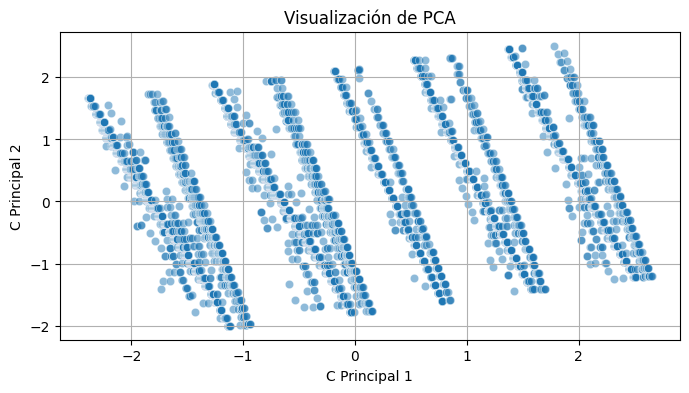

In [21]:
# PCA componentes principales
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Seleccionar las variables para el análisis multivariado
variables_seleccionadas = ['Edad', 'AÑO', 'Cant-pac']

# Crear un DataFrame solo con las variables seleccionadas
data_multivariado = data[variables_seleccionadas]

# Estandarizar los datos para PCA
scaler = StandardScaler()
data_multivariado_estandarizado = scaler.fit_transform(data_multivariado)

# Aplicar PCA
pca = PCA(n_components=2)
componentes_principales = pca.fit_transform(data_multivariado_estandarizado)

# DataFrame con las componentes principales
df_pca = pd.DataFrame(data=componentes_principales, columns=['Componente 1', 'Componente 2'])

# df_pca['Clase'] = data['Clase']

# Visualizar los resultados
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df_pca, x='Componente 1', y='Componente 2', alpha=0.5)
plt.title('Visualización de PCA')
plt.xlabel('C Principal 1')
plt.ylabel('C Principal 2')
plt.grid(True)
plt.show()

# Estandarizar los datos para PCA
scaler = StandardScaler()
data_multivariado_estandarizado = scaler.fit_transform(data_multivariado)

plt.show()




El PCA ha identificado una relación entre la edad y la cantidad de pacientes en los datos. Sin embargo, es importante recordar que el PCA no implica causalidad; simplemente identifica patrones de covariación en los datos.
Cuando el CP1 tiene un valor alto (lo que indica edades mayores), es más probable que también tengas valores altos en la variable "Cant-pac" (mayor cantidad de pacientes).